# Исследовательский анализ данных о недвижимости

Данный ноутбук посвящён первичному анализу и визуализации данных о жилых домах (датасет Ames Housing). Цель анализа — изучить распределения признаков, выявить взаимосвязи с целевой переменной `SalePrice`, создать полезные признаки и определить наиболее важные факторы, влияющие на цену недвижимости.

### Этапы анализа:

- Загрузка и обзор данных
- Анализ пропущенных значений
- Исследование распределения цены
- Корреляционный анализ
- Создание новых признаков
- Визуализация взаимосвязей
- Оценка важности признаков (Random Forest)


# Анализ и визуализация данных Ames Housing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")


In [4]:
train_df = pd.read_csv(r"C:\Users\Matvey\Desktop\Проект на гит\kaggle_projects\data\train_3.csv")
test_df = pd.read_csv(r"C:\Users\Matvey\Desktop\Проект на гит\kaggle_projects\data\test_3.csv")
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")


Train shape: (1460, 81), Test shape: (1459, 80)


## Анализ пропущенных значений

In [6]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


## Распределение целевой переменной `SalePrice`

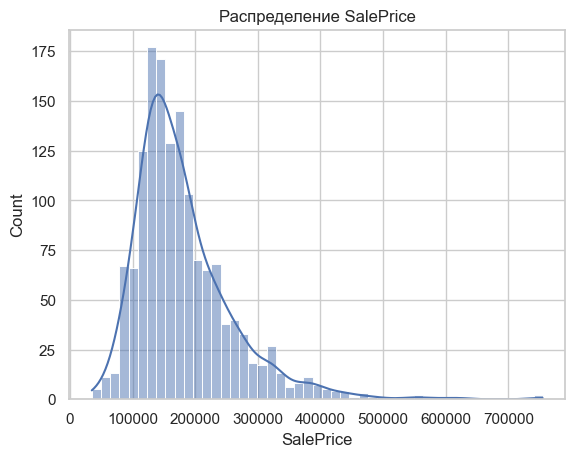

In [8]:
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.show()


## Корреляция признаков с `SalePrice`

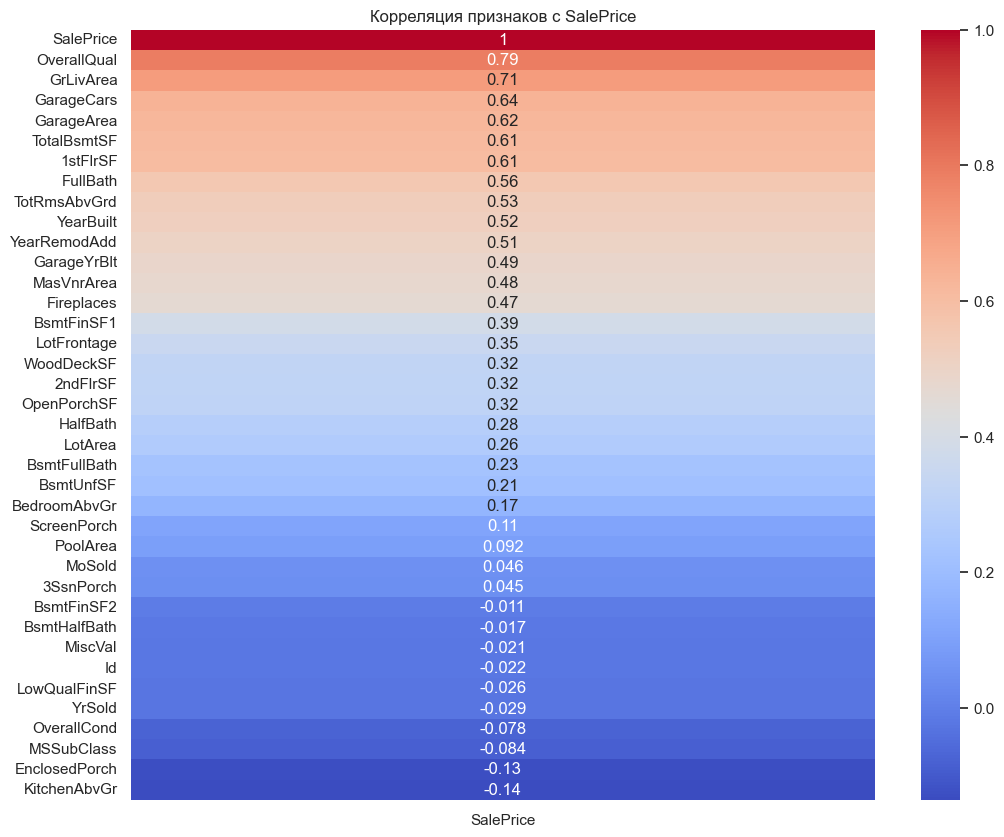

In [10]:
corr = train_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков с SalePrice')
plt.show()


## Создание новых признаков

In [12]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath'] +                              train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']


## Визуализация взаимосвязей

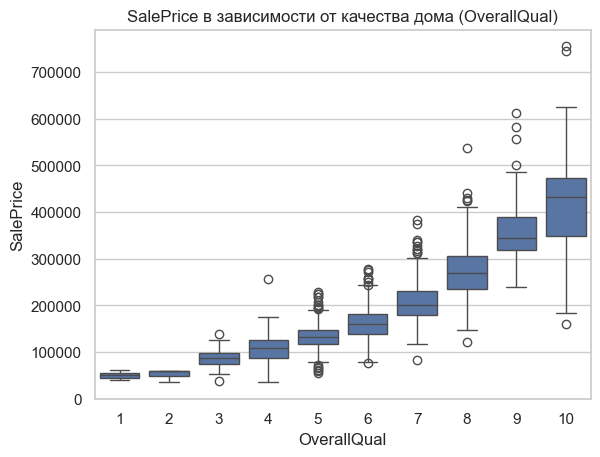

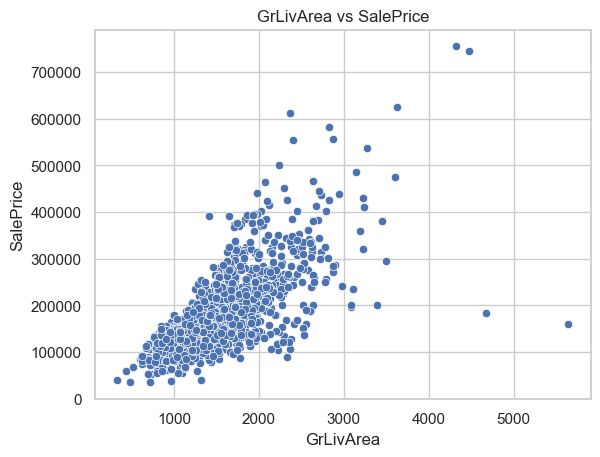

In [14]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('SalePrice в зависимости от качества дома (OverallQual)')
plt.show()

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs SalePrice')
plt.show()


## Оценка важности признаков (Random Forest)

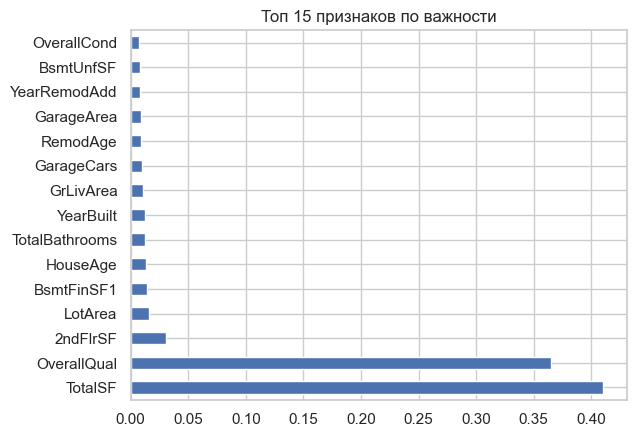

In [16]:
X = train_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'SalePrice']).fillna(0)
y = train_df['SalePrice']

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(15).plot(kind='barh')
plt.title('Топ 15 признаков по важности')
plt.show()


## 📌 Выводы

В результате проведённого исследовательского анализа были получены следующие ключевые наблюдения:

- **Целевая переменная `SalePrice`** имеет правостороннее распределение с выбросами; рекомендуется логарифмировать цену при построении модели.
- **Качество дома (`OverallQual`)** и **жилая площадь (`GrLivArea`)** показали сильную положительную корреляцию с ценой недвижимости.
- Были созданы новые признаки (`HouseAge`, `RemodAge`, `TotalBathrooms`, `TotalSF`), которые логически связаны с целевой переменной и могут повысить качество модели.
- **Корреляционный анализ** позволил отобрать значимые числовые переменные, наиболее тесно связанные с ценой.
- **Оценка важности признаков** с помощью модели Random Forest подтвердила влияние площади и качества на цену дома.
- Данные содержат значительное количество пропусков в категориальных переменных (`PoolQC`, `FireplaceQu`, `Alley` и др.), что требует аккуратной обработки при построении модели.

🔧 Полученные результаты и подготовленные признаки можно использовать в дальнейшем для построения моделей регрессии и прогнозирования стоимости недвижимости.
